
# 1. Analisis exploratorio Homicidios / DDP per capita


Importar librerías

In [1]:
#Librería
import pandas as pd
import numpy as np


# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Nulos
import missingno as msn
import os
import re
import sys



Cargar datos

In [2]:
#Capturar archivo de datos
path = r'C:\Users\xxaby\Desktop\master\TFM'
filehomicide = 'homicide_rate_unodc.csv'
filepercapita = 'gdp_per_capita_penn_world_table.csv'
fileesperanzavida = 'life_expectancy.csv'
funciones_auxiliares = 'funciones_auxiliares_done.py'


#Path
ruta_completahomicide = os.path.join(path, filehomicide)
ruta_completapercapita = os.path.join(path, filepercapita)
ruta_completaesperanzavida = os.path.join(path, fileesperanzavida)


#Cargar el archivo csv
dfhomicide = pd.read_csv(ruta_completahomicide)
#dfhomicide
#dfhomicide.count()


dfpercapita = pd.read_csv(ruta_completapercapita)
#dfpercapita
##dfpercapita.count()


dfesperanzavida = pd.read_csv(ruta_completaesperanzavida)
#dfpercapita
##dfpercapita.count()


# 2. Ver los datos 

In [3]:
print(dfhomicide.isna().mean()*100)
dfhomicide.count()
# Como podemos apreciar tenemos el Code un perocentaje de un 4% de 4028 filas seria unas 160 vacias 

Entity                                                          0.000000
Code                                                            4.186489
Year                                                            0.000000
Homicide rate per 100,000 population - Both sexes - All ages    0.000000
dtype: float64


Entity                                                          4204
Code                                                            4028
Year                                                            4204
Homicide rate per 100,000 population - Both sexes - All ages    4204
dtype: int64

In [4]:
print(dfpercapita.isna().mean()*100)
dfpercapita.count()

# Como podemos apreciar no tenemos ningún nulo

Entity                                                0.0
Code                                                  0.0
Year                                                  0.0
GDP per capita (output, multiple price benchmarks)    0.0
dtype: float64


Entity                                                10108
Code                                                  10108
Year                                                  10108
GDP per capita (output, multiple price benchmarks)    10108
dtype: int64

In [5]:
print(dfesperanzavida.isna().mean()*100)
dfesperanzavida.count()
# Como podemos apreciar tenemos el Code un perocentaje de un 8.16% de 19061 filas seria unas 1555 vacias 

Entity                                                 0.000000
Code                                                   8.161889
Year                                                   0.000000
Period life expectancy at birth - Sex: all - Age: 0    0.000000
dtype: float64


Entity                                                 20755
Code                                                   19061
Year                                                   20755
Period life expectancy at birth - Sex: all - Age: 0    20755
dtype: int64

# 3. Crear un único dataframe con los datos

In [6]:
# Unir PIB y homicidios
df_inicialespehomi = pd.merge(dfesperanzavida, dfhomicide, on=['Entity', 'Year'])


#filtraje de años
df_inicialespehomi = df_inicialespehomi[(df_inicialespehomi['Year'] >= 2000) & (df_inicialespehomi['Year'] <= 2019)]


#Contar nulos 
#print(df_inicial.isnull().sum())
df_inicialespehomi.info()
df_inicialespehomi.columns
df_inicialespehomi


<class 'pandas.core.frame.DataFrame'>
Index: 2772 entries, 0 to 4015
Data columns (total 6 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Entity                                                        2772 non-null   object 
 1   Code_x                                                        2772 non-null   object 
 2   Year                                                          2772 non-null   int64  
 3   Period life expectancy at birth - Sex: all - Age: 0           2772 non-null   float64
 4   Code_y                                                        2772 non-null   object 
 5   Homicide rate per 100,000 population - Both sexes - All ages  2772 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 151.6+ KB


,Entity,Code_x,Year,Period life expectancy at birth - Sex: all - Age: 0,Code_y,"Homicide rate per 100,000 population - Both sexes - All ages"
0,Afghanistan,AFG,2009,60.3636,AFG,4.071527
1,Afghanistan,AFG,2010,60.8508,AFG,3.487093
2,Afghanistan,AFG,2011,61.4191,AFG,4.208668
3,Afghanistan,AFG,2012,61.9230,AFG,6.393913
4,Afghanistan,AFG,2015,62.6587,AFG,9.975262
...,...,...,...,...,...,...
4011,Zimbabwe,ZWE,2006,45.3635,ZWE,8.693896
4012,Zimbabwe,ZWE,2010,50.6523,ZWE,5.537482
4013,Zimbabwe,ZWE,2012,55.6263,ZWE,7.395217
4014,Zimbabwe,ZWE,2018,61.4141,ZWE,4.876369


In [7]:

# Unimos los DF necesarios
df_espehomi = pd.merge(dfesperanzavida, dfhomicide, on=['Entity', 'Code', 'Year'])
df_espehomi


,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0,"Homicide rate per 100,000 population - Both sexes - All ages"
0,Afghanistan,AFG,2009,60.3636,4.071527
1,Afghanistan,AFG,2010,60.8508,3.487093
2,Afghanistan,AFG,2011,61.4191,4.208668
3,Afghanistan,AFG,2012,61.9230,6.393913
4,Afghanistan,AFG,2015,62.6587,9.975262
...,...,...,...,...,...
4013,Zimbabwe,ZWE,2012,55.6263,7.395217
4014,Zimbabwe,ZWE,2018,61.4141,4.876369
4015,Zimbabwe,ZWE,2019,61.2925,5.145035
4016,Zimbabwe,ZWE,2020,61.1242,4.977770


# 4. Filtros
Acordados en reunión para el procesamiento de los datos

In [8]:
# Unir PIB y homicidios
df_inicialpibhomi = pd.merge(dfpercapita, dfhomicide, on=['Entity', 'Year'])

#filtraje de años
df_inicial = df_inicialpibhomi[(df_inicialpibhomi['Year'] >= 2000) & (df_inicialpibhomi['Year'] <= 2019)]

#Contar nulos 
#print(df_inicial.isnull().sum())
#df_inicial.info()
df_inicial



,Entity,Code_x,Year,"GDP per capita (output, multiple price benchmarks)",Code_y,"Homicide rate per 100,000 population - Both sexes - All ages"
8,Albania,ALB,2000,5315.4300,ALB,4.116881
9,Albania,ALB,2001,5525.6910,ALB,6.976128
10,Albania,ALB,2002,5636.1846,ALB,6.915206
11,Albania,ALB,2003,5861.1265,ALB,5.366973
12,Albania,ALB,2004,6038.8965,ALB,4.277380
...,...,...,...,...,...,...
3309,Zimbabwe,ZWE,2006,1359.0446,ZWE,8.693896
3310,Zimbabwe,ZWE,2010,2281.9915,ZWE,5.537482
3311,Zimbabwe,ZWE,2012,2762.6843,ZWE,7.395217
3312,Zimbabwe,ZWE,2018,3007.2370,ZWE,4.876369


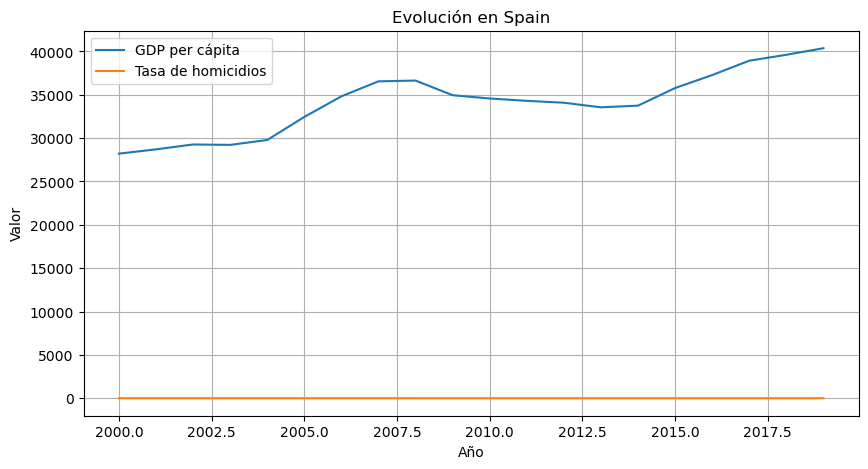

Verificación de los datos
GDP per cápita:
Min: 28207.709
Max: 40366.4

Tasa de homicidios:
Min: 0.61762637
Max: 1.4084697


In [9]:
#Línea temporal GDP per cápita para un país determinado

pais = "Spain"  # Cambia por el país que desees
df_pais = df_inicial[df_inicial['Entity'] == pais]

plt.figure(figsize=(10, 5))
plt.plot(df_pais['Year'], df_pais['GDP per capita (output, multiple price benchmarks)'], label='GDP per cápita')
plt.plot(df_pais['Year'], df_pais['Homicide rate per 100,000 population - Both sexes - All ages'], label='Tasa de homicidios')
plt.title(f'Evolución en {pais}')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


#Comprobación de los datos
print("Verificación de los datos")
print("GDP per cápita:")
print("Min:", df_pais['GDP per capita (output, multiple price benchmarks)'].min())
print("Max:", df_pais['GDP per capita (output, multiple price benchmarks)'].max())

print("\nTasa de homicidios:")
print("Min:", df_pais['Homicide rate per 100,000 population - Both sexes - All ages'].min())
print("Max:", df_pais['Homicide rate per 100,000 population - Both sexes - All ages'].max())


# Gráfico PIB-Homicidos en España, entre los años mostrados
La explicación del mismo seria. El PIB per cápita: crecimiento sostenido desde los 28,000 hasta 40,000 , con una leve caída en la crisis de 2008 de las hipotecas, luego recuperación.
Tasa de homicidios: línea casi plana, cercana a cero, sin variaciones relevantes.

# HIPÓTESIS
* En países desarrollados con PIB alto, la tasa de homicidios se mantiene baja de forma estable.
* Variaciones económicas (ej. crisis 2008) no afectan de manera directa la violencia homicida en contextos de instituciones fuertes y seguridad consolidada.

# CONCLUSIONES
1. España muestra que un alto nivel de PIB per cápita coexiste con una tasa de homicidios muy baja y estable.
2. A diferencia de países en desarrollo, aquí no hay relación visible entre variaciones del PIB y homicidios.
3. Refuerza la idea de que, una vez alcanzado cierto nivel de desarrollo e institucionalidad, los homicidios tienden a bajar.

C:\Users\xxaby\AppData\Local\Temp\ipykernel_17896\1155600298.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_hom = pivot_hom.fillna(method='bfill', axis=1).fillna(method='ffill', axis=1)


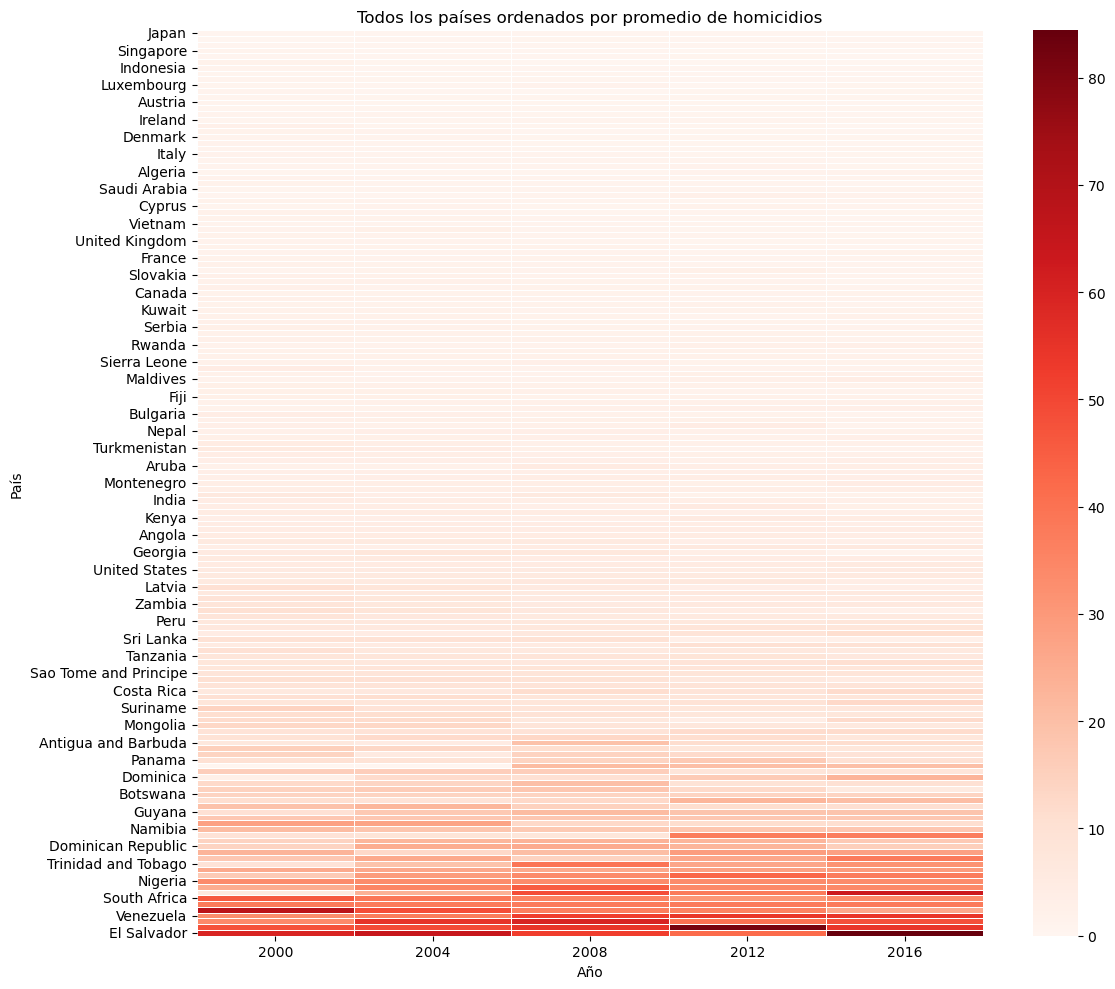

In [10]:
# Filtrar años cada 4
df_filtrado = df_inicial[df_inicial['Year'] % 4 == 0]

# Pivotear sin eliminar países
pivot_hom = df_filtrado.pivot(index='Entity', columns='Year',
    values='Homicide rate per 100,000 population - Both sexes - All ages')

# Rellenar valores faltantes con interpolación + relleno extremo
pivot_hom = pivot_hom.sort_index(axis=1)
pivot_hom = pivot_hom.interpolate(axis=1)
pivot_hom = pivot_hom.fillna(method='bfill', axis=1).fillna(method='ffill', axis=1)
pivot_hom = pivot_hom.fillna(0)  # Si aún quedan NaN, se rellenan con 0

# Ordenar países por promedio de homicidios
pivot_hom['Promedio'] = pivot_hom.mean(axis=1)
pivot_hom = pivot_hom.sort_values(by='Promedio', ascending=True).drop(columns='Promedio')

# Graficar mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_hom, cmap='Reds', linewidths=0.5)
plt.title("Todos los países ordenados por promedio de homicidios")
plt.xlabel("Año")
plt.ylabel("País")
plt.tight_layout()
plt.show()


# GRÁFICO
Mapa de Calor: Tasa de Homicidios por País
Explicación del Gráfico, el gráfico es un mapa de calor que representa la tasa de homicidios por cada 100K habitantes en una selección de países entre los años mostrados.


# HIPÓTESIS
1. Inestabilidad Política y Conflictos Sociales
    * Existe una posible correlación entre periodos de alta inestabilidad política o conflictos sociales y el aumento de las tasas de homicidios.
    Ejemplo: El pico en El Salvador en 2015 podría estar vinculado a un incremento en la violencia de pandillas o tensiones sociopolíticas.
    * Países como Honduras también muestran picos que podrían relacionarse con la actividad de grupos criminales organizados.

2. Desarrollo Económico y Desigualdad
    * Se plantea que la tasa de homicidios está inversamente relacionada con el nivel de desarrollo económico y la desigualdad social.
    * Países con tasas bajas (como Japón o los escandinavos) suelen tener:
    * Alto Índice de Desarrollo Humano (IDH)
    * Bajo coeficiente de Gini (menor desigualdad)  es una medida que cuantifica la desigualdad en la distribución de ingresos o riqueza dentro de una sociedad.
    * En cambio, países con tasas elevadas (celdas más oscuras) tienden a presentar:
    * Menor desarrollo institucional
    * Mayores niveles de desigualdad



C:\Users\xxaby\AppData\Local\Temp\ipykernel_17896\3109608163.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


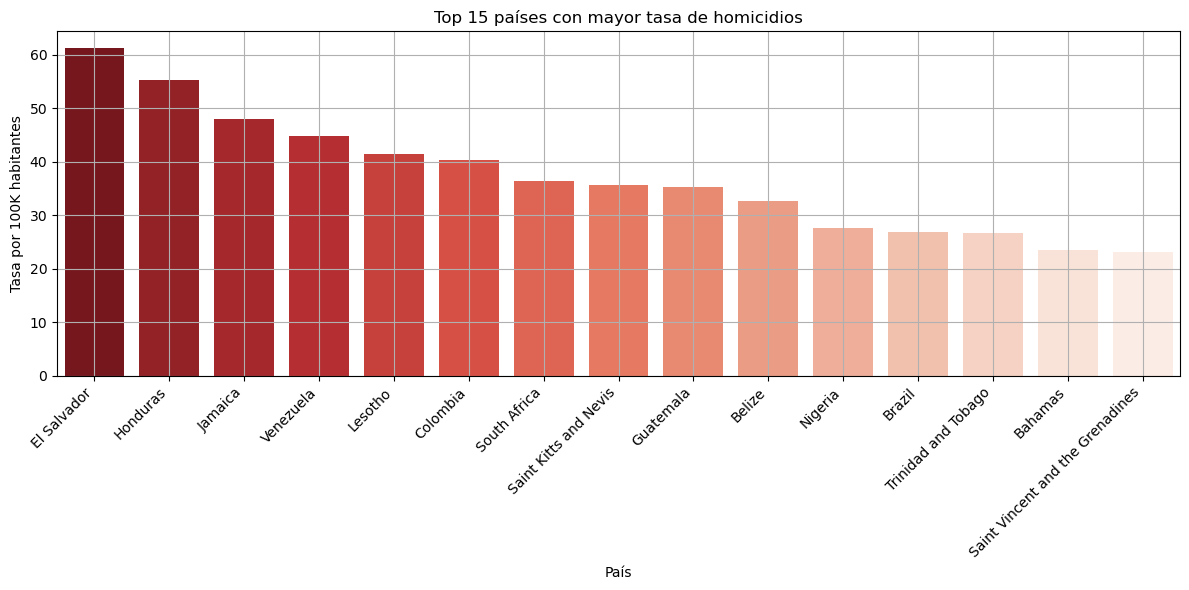

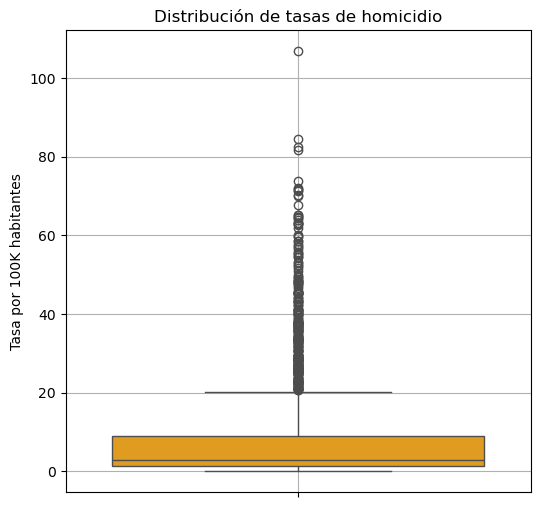

In [11]:

# Agrupar por país y calcular la media (por si hay duplicados)
df_agrupado = df_inicial.groupby('Entity', as_index=False)['Homicide rate per 100,000 population - Both sexes - All ages'].mean()

# Ordenar por tasa descendente y seleccionar los 15 países con mayor tasa
top15 = df_agrupado.sort_values('Homicide rate per 100,000 population - Both sexes - All ages', ascending=False).head(15)

# Visualizar gráfico
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top15,
    x='Entity',
    y='Homicide rate per 100,000 population - Both sexes - All ages',
    palette='Reds_r'
)

plt.xticks(rotation=45, ha='right')
plt.title('Top 15 países con mayor tasa de homicidios')
plt.ylabel('Tasa por 100K habitantes')
plt.xlabel('País')
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot para ver la dispersión
plt.figure(figsize=(6, 6))
sns.boxplot(data=df_inicial, y='Homicide rate per 100,000 population - Both sexes - All ages', color='orange')
plt.title('Distribución de tasas de homicidio')
plt.ylabel('Tasa por 100K habitantes')
plt.grid(True)
plt.show()


# GRÁFICO
 Gráfico de barras: Top 15 países con mayor tasa de homicidios

   * Este gráfico muestra los 15 países con mayor tasa promedio de homicidios por cada 100,000 habitantes.
   * Los países están ordenados de mayor a menor, lo que facilita identificar los focos críticos de violencia.
   * El Salvador, Honduras, Jamaica y Venezuela encabezan la lista con tasas superiores a 50.
   * El uso de la paleta de colores Reds_r refuerza visualmente la gravedad de los valores más altos.
   * Este gráfico permite una comparación directa entre países y destaca regiones con problemas estructurales de seguridad.

 Boxplot: Distribución de tasas de homicidio

   * El boxplot representa la dispersión de todas las tasas de homicidio en el conjunto de datos.
   * La caja central muestra el rango intercuartílico (IQR), que contiene el 50% de los valores centrales.
   * La línea dentro de la caja indica la mediana.
   * Los puntos fuera de los bigotes representan outliers, es decir, países con tasas excepcionalmente altas.
   * Este gráfico es útil para detectar anomalías y entender la variabilidad global de los datos.


# HIPÓTESIS
* Hipótesis nula (H₀)
  No existen diferencias significativas entre las tasas de homicidio de los países analizados.
  Esta hipótesis asume que las variaciones observadas podrían deberse al azar o a fluctuaciones normales dentro de los datos.
* Hipótesis alternativa (H₁)
  Al menos un país presenta una tasa de homicidios significativamente diferente al resto.

* Esta hipótesis se apoya en la visualización y en los resultados estadísticos que sugieren la existencia de outliers y diferencias marcadas entre países.

# CONCLUSIONES

1. Desigualdad extrema: Existe una gran disparidad entre los países con tasas más altas y aquellos con tasas más bajas, lo que refleja diferencias profundas en seguridad, gobernanza y desarrollo social.
2. Presencia de outliers: El boxplot confirma que algunos países tienen tasas de homicidio muy por encima del promedio, lo que valida la hipótesis alternativa (H₁).
3. Concentración regional: Los países con mayores tasas pertenecen principalmente a América Latina y el Caribe, lo que sugiere patrones regionales de violencia.
4. Visualización efectiva: Los gráficos permiten identificar rápidamente los países más afectados y entender la distribución general de los datos.
5. Base para análisis comparativo: Este enfoque puede extenderse a análisis por año, región o correlación con otras variables como pobreza, educación o corrupción.

In [12]:
# Primero, crea una columna de categorías de GDP per cápita
df_inicial['GDP_category'] = pd.cut(df_inicial['GDP per capita (output, multiple price benchmarks)'],
                                    bins=[0, 10000, 30000, 100000],
                                    labels=['Bajo', 'Medio', 'Alto'])

# Etiquetaje de columnas correcto para evita confusión entre los lectores, reenombrando 'PIB bajo' por 'RPC baja'
df_inicial['GDP_category'] = df_inicial['GDP_category'].replace({
    'PIB bajo': 'RPC baja',
    'PIB medio': 'RPC media',
    'PIB alto': 'RPC alta'
})

# Gráfico scatter
fig = px.scatter(
    df_inicial[(df_inicial['Year'] >= 2000) & (df_inicial['Year'] <= 2020)],
    x='GDP per capita (output, multiple price benchmarks)',
    y='Homicide rate per 100,000 population - Both sexes - All ages',
    animation_frame='Year',
    animation_group='Entity',
    size='Homicide rate per 100,000 population - Both sexes - All ages',
    color='GDP_category',
    hover_name='Entity',
    size_max=50,
    range_x=[0, df_inicial['GDP per capita (output, multiple price benchmarks)'].max()],
    range_y=[0, df_inicial['Homicide rate per 100,000 population - Both sexes - All ages'].max()],
    title='Evolución de la GDP per cápita y la tasa de homicidios',
    labels={
        'GDP per capita (output, multiple price benchmarks)': 'GDP per cápita',
        'Homicide rate per 100,000 population - Both sexes - All ages': 'Tasa de homicidios',
        'Entity': 'País',
        'Year': 'Año',
        'GDP_category': 'Categoría económica'
    }
)
fig.show()


C:\Users\xxaby\AppData\Local\Temp\ipykernel_17896\929987120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inicial['GDP_category'] = pd.cut(df_inicial['GDP per capita (output, multiple price benchmarks)'],
C:\Users\xxaby\AppData\Local\Temp\ipykernel_17896\929987120.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inicial['GDP_category'] = df_inicial['GDP_category'].replace({


In [13]:
# Comprovación de los valores extremadamente altos, por eso la gráfica anterior llega a 160K en GDP per cápita
print(df_inicial['GDP per capita (output, multiple price benchmarks)'].sort_values(ascending=False).head(10))


2481    169200.27
2480    167820.64
2482    164968.48
2477    161521.75
2483    147262.56
1799    145062.58
1797    144189.69
1798    143194.12
1796    139520.05
2479    137985.22
Name: GDP per capita (output, multiple price benchmarks), dtype: float64


# GRÁFICO 
Muestra la evolución de la GDP per cápita y la tasa de homicidios entre los años mostrados para distintos países.
* Eje X: GDP per cápita (GDP por cápita)
* Eje Y: Tasa de homicidios por cada 100K habitantes
* Tamaño de la burbuja: Magnitud de la tasa de homicidios
* Color: Categoría económica del país (GDP baja, medio o alta)
* Animación: Permite ver cómo cambian estos valores año a año

# HIPÓTESIS
* No existe una relación significativa entre la GDP per cápita de un país y su tasa de homicidios.
* Existe una relación inversa significativa entre la GDP per cápita de un país y su tasa de homicidios: a mayor GDP, menor violencia.


# CONCLUSIONES
1. Relación inversa evidente. A medida que la GDP per cápita aumenta, la tasa de homicidios tiende a disminuir. Los países con GDP alta suelen tener tasas de homicidio más bajas.
2. Persistencia de violencia en economías bajas. Los países con GDP bajo presentan burbujas más grandes y más altas en el eje Y, lo que indica tasas de homicidio elevadas y persistentes.
3. Estabilidad en economías altas. Los países con GDP alto muestran poca variación en homicidios a lo largo del tiempo, lo que sugiere mayor estabilidad social.
4. Casos atípicos. Algunos países con GDP media o alta presentan tasas de homicidio inesperadamente altas, lo que podría deberse a factores políticos, sociales o culturales específicos.